# 0. Name & Z-ID
Matt Borek

z1951125

# 1. Maximum Combat Power

## 1a. Compute Combat Power

In [1]:
from pathlib import Path
import numpy as np
import pandas as pd

df = pd.read_json('pokemon.json')

df['max_cp'] = (((2 * round(df['attack']**0.5 * df['sp_attack']**0.5 + df['speed']**0.5)) + 15) *
                (((2 * round(df['defense']**0.5 * df['sp_defense']**0.5 + df['speed']**0.5)) + 15)**0.5) *
                (((2 * df['hp']) + 15)**0.5) * 0.7903001**2 / 10)
df

,name,generation,species,primary_type,hp,height_m,weight_kg,speed,attack,defense,sp_attack,sp_defense,max_cp
0,Bulbasaur,1,Seed Pokémon,Grass,45,0.7,6.9,45,49,49,65,65,1071.537544
1,Ivysaur,1,Seed Pokémon,Grass,60,1.0,13.0,60,62,63,80,80,1632.187772
2,Venusaur,1,Seed Pokémon,Grass,80,2.0,100.0,80,82,83,100,100,2580.488521
3,Mega Venusaur,1,Seed Pokémon,Grass,80,2.4,155.5,80,100,123,122,120,3466.490116
4,Charmander,1,Lizard Pokémon,Fire,39,0.6,8.5,65,52,43,60,50,955.243610
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,Zacian Hero of Many Battles,8,Warrior Pokémon,Fairy,92,2.8,110.0,138,130,115,80,115,3511.502853
1024,Zamazenta Crowned Shield,8,Warrior Pokémon,Fighting,92,2.9,785.0,128,130,145,80,145,3839.737461
1025,Zamazenta Hero of Many Battles,8,Warrior Pokémon,Fighting,92,2.9,210.0,138,130,115,80,115,3511.502853
1026,Eternatus,8,Gigantic Pokémon,Poison,140,20.0,950.0,130,85,95,145,95,4186.082415


## 1b. Maximum Combat Power by Generation

In [2]:
gen_cp = df.sort_values('max_cp' ,ascending=False).drop_duplicates(subset='generation', keep='first')
gen_cp[['name', 'max_cp']]

,name,max_cp
1027,Eternatus Eternamax,9186.088759
458,Mega Rayquaza,5725.850606
189,Mega Mewtwo X,5490.480903
930,Ultra Necrozma,5091.398806
750,White Kyurem,4895.570422
526,Mega Garchomp,4720.455236
835,Zygarde Complete Forme,4669.483338
295,Mega Tyranitar,4464.706056


# 2. Primary Types and Attack, Defense, & Speed

## 2a. Bar Chart

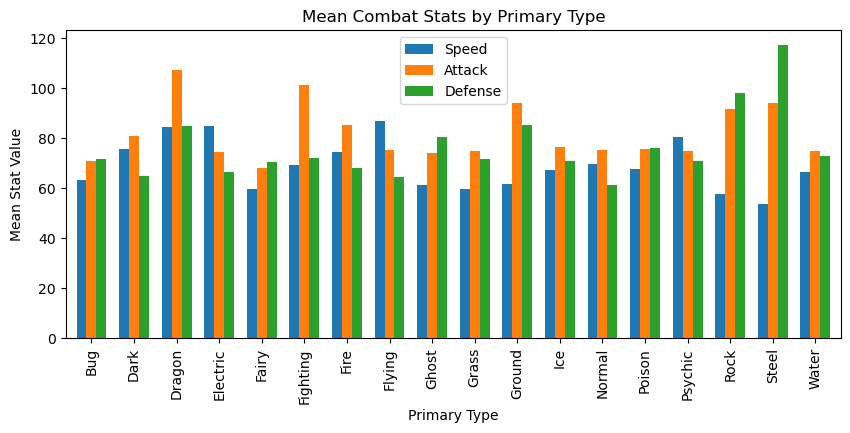

In [3]:
groups = df.groupby('primary_type')[['speed', 'attack', 'defense']].mean()
stat_bars = groups.plot.bar(figsize=(10, 4), width=0.7)

stat_bars.set_xlabel('Primary Type')
stat_bars.set_ylabel('Mean Stat Value')
stat_bars.set_title('Mean Combat Stats by Primary Type')
stat_bars.legend(['Speed', 'Attack', 'Defense'])


## 2b. Scatterplot

'Dragon'

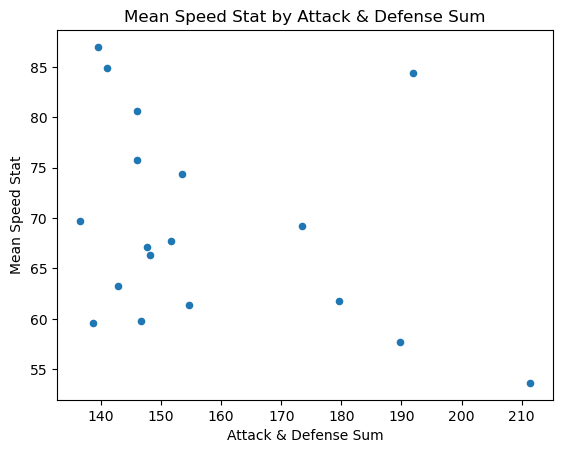

In [4]:
groups['atk&def'] = groups['attack'] + groups['defense']

stat_scatter = groups.plot.scatter(x='atk&def', y='speed')

stat_scatter.set_xlabel('Attack & Defense Sum')
stat_scatter.set_ylabel('Mean Speed Stat')
stat_scatter.set_title('Mean Speed Stat by Attack & Defense Sum')

outlier = groups[(groups['atk&def'] > 185) & (groups['speed'] > 80)]
outlier.index[0]

## 2c. Scatter Matrix & 2d. Brushing Interaction (extra credit)

In [5]:
import altair as alt

matrix_groups = groups[['speed', 'attack', 'defense']].reset_index()
brush = alt.selection_interval(resolve='global')

stat_matrix = alt.Chart(matrix_groups).mark_point(size=100).encode(
    alt.X(alt.repeat('column'), type='quantitative'),
    alt.Y(alt.repeat('row'), type='quantitative'),
    color=alt.condition(brush, 'primary_type', alt.ColorValue('gray')),
).properties(
    width=250,
    height=250,
    title='Scatter matrix of stat distributions'   
).repeat(
    row=['speed', 'attack', 'defense'],
    column=['speed', 'attack', 'defense']
).add_selection(
    brush
)#.interactive() the interactive mode is so janky I hate it

stat_matrix

c:\tools\Anaconda3\lib\site-packages\altair\utils\core.py:283: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.RepeatChart(...)

## 3. Attack-Defense Distribution

## 3a. Bubble Chart

In [6]:
bubble_resample = df.sample(frac=1).reset_index(drop=True)
stat_bubble = alt.Chart(bubble_resample).mark_circle().encode(
    x='attack:Q',
    y='defense:Q',
    size='speed:Q',
    color=alt.Color('generation:N')
).properties(
    width=500,
    height=400,
    title='Stat visualization by generation'
).interactive()

stat_bubble

alt.Chart(...)

## 3b. Binned Scatterplot

In [7]:
stat_binned = alt.Chart(df).mark_rect().encode(
    x=alt.X('attack:Q', bin=alt.Bin(maxbins=40)),
    y=alt.Y('defense:Q', bin=alt.Bin(maxbins=30)),
    color=alt.Color('count()'),
    tooltip=['count()']
).properties(
    width=500,
    height=400,
    title='Distribution by Attack & Defense'
)

stat_binned

alt.Chart(...)